INFO:root:正在从 /data/vla/uav_flow_lerobot_3w_final/test/uav_flow/data/chunk-001/episode_000120.parquet 加载并处理 Parquet 数据...


正在处理 Parquet 文件中的 52 行: /data/vla/uav_flow_lerobot_3w_final/test/uav_flow/data/chunk-001/episode_000120.parquet


INFO:root:成功获取任务提示: 'Go to the tree on the right side'
INFO:root:正在连接到服务器 ws://222.130.22.78:6666
INFO:WebSocketClient:已连接到 ws://222.130.22.78:6666
INFO:root:正在发送 'reset' 指令初始化任务...
INFO:root:准备调用远程API (action: reset)...
INFO:root:发送JSON: {
  "action": "reset",
  "data": {
    "task": "Go to the tree on the right side",
    "seq": "placeholder",
    "steps": 0,
    "msg_type": "action_query",
    "image": null,
    "start_pose": "",
    "target_pose": ""
  }
}
INFO:root:正在发送数据到云端并等待响应...
INFO:root:成功收到API响应: 重置成功
INFO:root:开始循环推理...
INFO:root:正在执行第 1/52 步推理...
INFO:root:发送请求体:
{
  "action": "next",
  "data": {
    "task": "Go to the tree on the right side",
    "seq": "placeholder",
    "steps": 1,
    "msg_type": "action_query",
    "image": "/data/vla/VLA_Diff/Openpi/test/infer/infer_output/images_ep120/wrist_image_ep120_frame_0.png",
    "start_pose": "",
    "target_pose": ""
  }
}



已将场景的采集数据保存至: /data/vla/VLA_Diff/Openpi/test/infer/infer_output/episode_data_120.json


INFO:root:本步API调用时延: 0.3936 秒
INFO:root:收到响应体: {'step': 1, 'path': [[[0.6653319794380188, 0.036348656272810365, 0.0403566913120188], [0.6457171658509744, 0.04534262377083409, 0.04301649989439471], [0.6323384383978907, -0.02020037125703511, 0.05014551065259942], [0.6781504445251167, -0.0197441555143818, 0.040989979069727456], [0.648622647065533, 0.00550589227803977, 0.04797423834045578], [0.6900426467056358, 0.025421203008303195, 0.041532797147763256], [0.7041646367950019, 0.023324783048014996, 0.04330600286934727], [0.6871596886012674, 0.07921121152305433, 0.0634264596285441]]]}
INFO:root:收到 8 个路径点，下一次将从第 9 步开始。
INFO:root:正在执行第 9/52 步推理...
INFO:root:发送请求体:
{
  "action": "next",
  "data": {
    "task": "Go to the tree on the right side",
    "seq": "placeholder",
    "steps": 9,
    "msg_type": "action_query",
    "image": "/data/vla/VLA_Diff/Openpi/test/infer/infer_output/images_ep120/wrist_image_ep120_frame_8.png",
    "start_pose": "",
    "target_pose": ""
  }
}
INFO:root:本步API调用时延:


--- 轨迹偏差分析 ---
平均绝对位置误差 (Positional MAE): 2.1020
平均绝对姿态误差 (Rotational MAE): 0.5397

--- API 时延分析 ---
总调用次数: 7
平均时延: 0.3528 秒
最小时延: 0.3418 秒
最大时延: 0.3936 秒

每个点的具体位置误差:
  点 0: 0.0000
  点 1: 0.6478
  点 2: 0.5983
  点 3: 0.5334
  点 4: 0.5233
  点 5: 0.4403
  点 6: 0.4220
  点 7: 0.3741
  点 8: 0.3025
  点 9: 0.8160
  点 10: 0.9385
  点 11: 0.8355
  点 12: 0.8086
  点 13: 0.8462
  点 14: 0.8790
  点 15: 0.9248
  点 16: 0.8042
  点 17: 1.3230
  点 18: 1.4163
  点 19: 1.3841
  点 20: 1.3374
  点 21: 1.2484
  点 22: 1.3619
  点 23: 1.3682
  点 24: 1.3198
  点 25: 1.8797
  点 26: 1.9928
  点 27: 1.9840
  点 28: 1.9634
  点 29: 2.0349
  点 30: 2.1255
  点 31: 2.1367
  点 32: 2.1025
  点 33: 2.6951
  点 34: 2.8028
  点 35: 2.8178
  点 36: 2.8338
  点 37: 2.8749
  点 38: 2.9882
  点 39: 3.0173
  点 40: 2.9905
  点 41: 3.6117
  点 42: 3.7627
  点 43: 3.7930
  点 44: 3.8304
  点 45: 3.9795
  点 46: 4.1127
  点 47: 4.1561
  点 48: 4.1933
  点 49: 4.6752
  点 50: 4.8599
  点 51: 4.8906
  点 52: 4.8489
------------------------



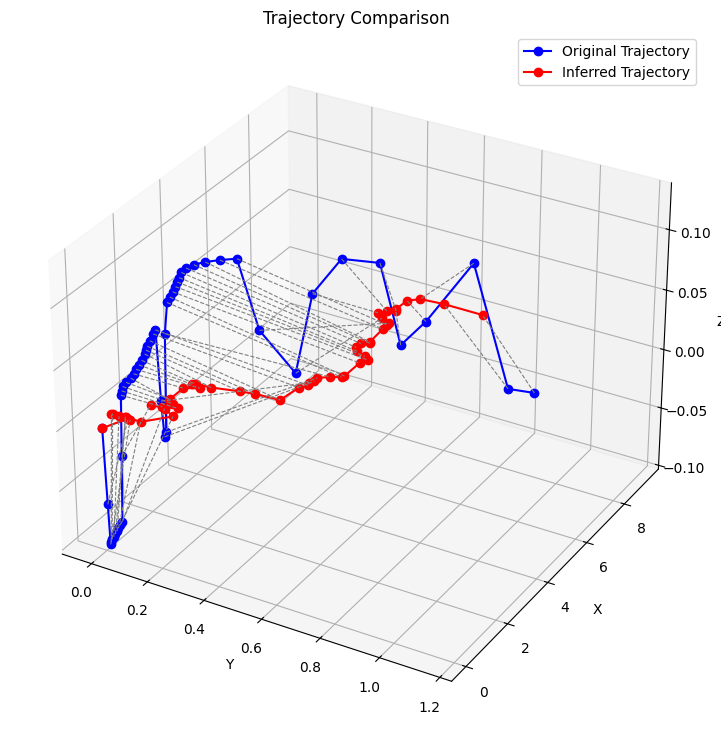

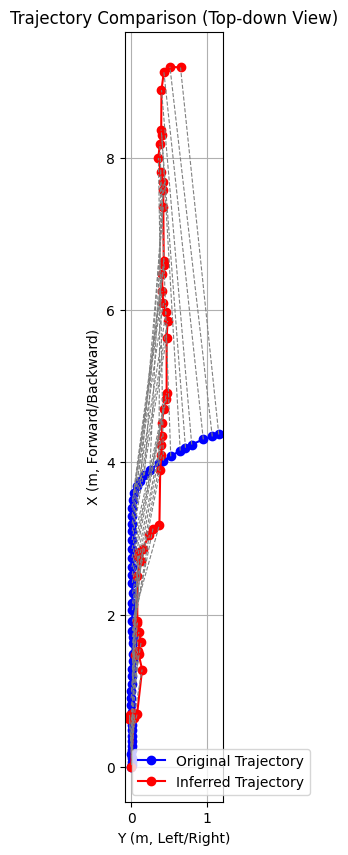

INFO:root:正在保存推理轨迹到 /data/vla/VLA_Diff/Openpi/test/infer/trajectory_video/inferred_trajectory_000120.json...
INFO:root:推理轨迹已保存到 /data/vla/VLA_Diff/Openpi/test/infer/trajectory_video/inferred_trajectory_000120.json


In [2]:
import json
import logging
import sys
import os
import re

import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import asyncio

# --- 新增的依赖 ---
import cv2
import base64
import time
import websockets
import threading
from typing import Optional
from threading import Thread
from concurrent.futures import Future
# --- 依赖结束 ---


# --- 从 api_caller.py 复制过来的代码 ---

# WebSocket配置
WS_TIMEOUT = 10  # 超时时间(秒)

class WebSocketClient:
    """WebSocket客户端（无ROS依赖）"""
    def __init__(self, url):
        self.url = url
        self.logger = logging.getLogger("WebSocketClient")
        self.ws = None
        self._connected = False
        self._event_loop = asyncio.new_event_loop()
        self._response_future = None
        
        self._run_thread = Thread(target=self._start_event_loop, daemon=True)
        self._run_thread.start()
        
        connect_task = asyncio.run_coroutine_threadsafe(self._connect(), self._event_loop)
        try:
            connect_task.result(WS_TIMEOUT)
        except TimeoutError:
            raise ConnectionError("连接超时")
        except Exception as e:
            raise ConnectionError(f"连接失败: {str(e)}")

    def _start_event_loop(self):
        asyncio.set_event_loop(self._event_loop)
        self._event_loop.run_forever()

    async def _connect(self):
        try:
            self.ws = await websockets.connect(
                self.url,
                ping_interval=20,
                ping_timeout=30,
                close_timeout=10
            )
            self._connected = True
            self.logger.info(f"已连接到 {self.url}")
            asyncio.create_task(self._listen())
        except Exception as e:
            self.logger.error(f"连接失败: {str(e)}")
            self._connected = False
            raise

    async def _listen(self):
        try:
            while self._connected:
                try:
                    message = await self.ws.recv()
                    await self._handle_message(message)
                except websockets.exceptions.ConnectionClosed as e:
                    self.logger.warning(f"连接已关闭。代码: {e.code}, 原因: '{e.reason}'")
                    break
        finally:
            self._connected = False
            self.logger.warning("消息监听循环退出")

    async def send_message(self, data, timeout=WS_TIMEOUT):
        if not self._connected:
            raise ConnectionError("未连接到服务器")
        if self._response_future and not self._response_future.done():
            raise RuntimeError("存在未完成的请求")
        
        self._response_future = self._event_loop.create_future()
        await self.ws.send(json.dumps(data))
        
        try:
            return await asyncio.wait_for(self._response_future, timeout)
        except asyncio.TimeoutError:
            self.logger.warning("等待响应超时")
            return None
        finally:
            self._response_future = None
    
    async def _handle_message(self, message):
        try:
            msg = json.loads(message)
            action = msg.get("action")
            if action not in ["ai_response", "reset"]:
                self.logger.warning(f"收到未知action类型消息: {action}")
                return
            
            response_data = msg.get("data", {})
            if "msg" not in response_data:
                self.logger.error("响应缺少msg字段")
                return
                
            if self._response_future and not self._response_future.done():
                # 移除 str() 转换，直接返回原始的 msg 内容
                self._response_future.set_result(response_data["msg"])
            else:
                self.logger.warning("收到未预期的响应")
        except Exception as e:
            self.logger.error(f"消息处理失败: {str(e)}")

def process_image_from_file(image_path: str) -> Optional[str]:
    """从文件路径读取图片并进行Base64编码"""
    try:
        cv_image = cv2.imread(image_path)
        if cv_image is None:
            logging.error(f"无法从路径读取图片: {image_path}")
            return None
        
        # 将OpenCV默认的BGR格式转换为RGB
        cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
        
        success, buffer = cv2.imencode(".jpg", cv_image_rgb, [cv2.IMWRITE_JPEG_QUALITY, 85])
        if not success:
            raise ValueError("图像编码失败")
            
        return base64.b64encode(buffer).decode('utf-8')
    except Exception as e:
        logging.error(f"图像处理失败: {str(e)}")
        return None

def call_remote_api(client: WebSocketClient, instruction: str, image_path: str, action: str, steps: int):
    """调用远程API的示例函数"""
    logging.info(f"准备调用远程API (action: {action})...")
    
    # 2. 构造消息
    data_payload = {
        "task": instruction,
        "seq": "placeholder",
        "steps": steps,
        "msg_type": 'action_query',
        "image": None,
        # 为了安全起见，使用浮点数
        "start_pose": "",
        "target_pose": ""
    }

    if action == "next":
        image_base64 = process_image_from_file(image_path)
        if not image_base64:
            logging.error("图片处理失败，取消API调用")
            return
        data_payload["image"] = image_base64
    
    msg = {
        "action": action,
        "data": data_payload
    }
    
    # 3. 发送消息并等待结果
    try:
        # 增加日志，打印出将要发送的完整JSON
        logging.info(f"发送JSON: {json.dumps(msg, indent=2)}")
        logging.info("正在发送数据到云端并等待响应...")
        # 从主线程调用运行在客户端线程事件循环中的协程
        future = asyncio.run_coroutine_threadsafe(
            client.send_message(msg),
            client._event_loop
        )
        response = future.result(timeout=WS_TIMEOUT + 2) # 等待结果返回
        
        if response:
            logging.info(f"成功收到API响应: {response}")
        else:
            logging.warning("API调用超时或未返回有效结果。")
            
    except Exception as e:
        logging.error(f"API调用过程中发生错误: {e}")



sys.path.append('/data/vla/VLA_Diff/Openpi/test/parquet_2_json/uav_flow')
from parquet_2_json import process_parquet_episode
# 添加路径以导入视频生成脚本
sys.path.append('/data/vla/VLA_Diff/Openpi/test/infer/trajectory_video/py')
# from trajectory_video_new import generate_video_from_trajectory

def get_prompt_from_task_index(tasks_jsonl_path, task_index):
    """
    从 tasks.jsonl 文件中根据 task_index 查找并返回对应的 prompt。
    """
    try:
        with open(tasks_jsonl_path, 'r') as f:
            for line in f:
                data = json.loads(line)
                if data.get('task_index') == task_index:
                    return data.get('task')
    except FileNotFoundError:
        logging.error(f"tasks.jsonl 文件未找到: {tasks_jsonl_path}")
        return None
    except json.JSONDecodeError:
        logging.error(f"解析 tasks.jsonl 文件时出错: {tasks_jsonl_path}")
        return None
    
    logging.warning(f"在 {tasks_jsonl_path} 中未找到 task_index {task_index} 对应的任务。")
    return None

def calculate_trajectory_deviation(traj1, traj2):
    """
    计算两条轨迹的位置和姿态偏差。
    轨迹应为 (N, 6) 的形状，其中 N 是点数，6是 (x, y, z, roll, pitch, yaw)。
    """
    pos1, rot1 = traj1[:, :3], traj1[:, 3:]
    pos2, rot2 = traj2[:, :3], traj2[:, 3:]

    positional_errors = np.linalg.norm(pos1 - pos2, axis=1)
    positional_mae = np.mean(positional_errors)

    rotational_errors = np.abs(rot1 - rot2)
    rotational_mae = np.mean(rotational_errors)

    return positional_mae, rotational_mae, positional_errors


def visualize_trajectories_3d(traj1, traj2):
    """
    使用 matplotlib 可视化两条3D轨迹。
    """
    pos1 = traj1[:, :3]
    pos2 = traj2[:, :3]

    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # 交换X和Y轴以匹配俯视图
    ax.plot(pos1[:, 1], pos1[:, 0], pos1[:, 2], 'o-', label='Original Trajectory', color='blue')
    ax.plot(pos2[:, 1], pos2[:, 0], pos2[:, 2], 'o-', label='Inferred Trajectory', color='red')

    for i in range(len(pos1)):
        ax.plot([pos1[i, 1], pos2[i, 1]], [pos1[i, 0], pos2[i, 0]], [pos1[i, 2], pos2[i, 2]],
                '--', color='gray', linewidth=0.8)

    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.set_zlabel('Z')
    ax.set_title('Trajectory Comparison')
    ax.legend()
    plt.show()

def visualize_trajectories_2d_topdown(traj1, traj2):
    """
    使用 matplotlib 可视化两条轨迹的俯视图。
    横轴为Y (左/右), 纵轴为X (前/后)
    """
    pos1 = traj1[:, :2]  # 只取 X, Y 坐标
    pos2 = traj2[:, :2]  # 只取 X, Y 坐标

    fig, ax = plt.subplots(figsize=(10, 10))

    # 交换X和Y轴进行绘图
    ax.plot(pos1[:, 1], pos1[:, 0], 'o-', label='Original Trajectory', color='blue')
    ax.plot(pos2[:, 1], pos2[:, 0], 'o-', label='Inferred Trajectory', color='red')

    for i in range(len(pos1)):
        ax.plot([pos1[i, 1], pos2[i, 1]], [pos1[i, 0], pos2[i, 0]],
                '--', color='gray', linewidth=0.8)

    ax.set_xlabel('Y (m, Left/Right)')
    ax.set_ylabel('X (m, Forward/Backward)')
    ax.set_title('Trajectory Comparison (Top-down View)')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    plt.show()

def main():
    HOST = "222.130.22.78"
    PORT = 6666
    SERVER_URL = f"ws://{HOST}:{PORT}"
    # 将此路径更改为指向 Parquet 文件
    # EPISODE_DATA_PATH = "/home/adminroot/lxx/dataset/uav_flow_lerobot_format/fixed_command/pass/train_without_first_10/uav_flow/data/chunk-000/episode_000022.parquet"
    # EPISODE_DATA_PATH = "/home/adminroot/lxx/dataset/uav_flow_lerobot_format/train/uav_flow/data/chunk-000/episode_000020.parquet"
    # 这条数据感觉有问题
    # EPISODE_DATA_PATH = "/home/adminroot/lxx/dataset/uav_flow_lerobot_format/fixed_command/train0621/uav_flow/data/chunk-000/episode_000102.parquet"
    EPISODE_DATA_PATH = "/data/vla/uav_flow_lerobot_3w_final/test/uav_flow/data/chunk-001/episode_000120.parquet"
    IGNORE_FIRST_10 = False  # 开关：True则忽略前10条数据，False则保持原样

    logging.info(f"正在从 {EPISODE_DATA_PATH} 加载并处理 Parquet 数据...")
    
    # 定义提取出的图像的存放位置。评估脚本需要这些位于磁盘上的图像。
    output_dir_for_images = "/data/vla/VLA_Diff/Openpi/test/infer/infer_output"
    
    # 调用函数来处理 Parquet 文件。
    # 它会将图像保存到 `output_dir_for_images` 并返回所需的数据结构。
    episode_data = process_parquet_episode(EPISODE_DATA_PATH, output_dir_for_images, save_json=True)

    if IGNORE_FIRST_10:
        if len(episode_data) > 10:
            logging.info("开关为True，正在忽略原始数据中的前10条数据...")
            episode_data = episode_data[10:]
        else:
            logging.warning(f"数据总数不足10条 (只有 {len(episode_data)} 条)，无法忽略。将使用所有数据。")

    if not episode_data:
        logging.error("未能从 Parquet 文件加载数据。正在中止。")
        return

    # 1. 从 episode 数据中获取 task_index
    if 'task_index' not in episode_data[0] or episode_data[0]['task_index'] is None:
        logging.error("在 episode 数据的第一帧中未找到 'task_index'。")
        return
    task_index = episode_data[0]['task_index']

    # 2. 构造 tasks.jsonl 的路径
    try:
        # 假设路径结构为 .../test/uav_flow/data/chunk-xxx/episode_xxxxx.parquet
        # 我们需要 .../test/uav_flow/meta/tasks.jsonl
        base_path = os.path.dirname(os.path.dirname(os.path.dirname(EPISODE_DATA_PATH)))
        tasks_jsonl_path = os.path.join(base_path, 'meta', 'tasks.jsonl')
    except Exception as e:
        logging.error(f"无法从 EPISODE_DATA_PATH 推断 'meta' 目录路径: {EPISODE_DATA_PATH}. Error: {e}")
        return

    # 3. 获取 PROMPT
    PROMPT = get_prompt_from_task_index(tasks_jsonl_path, task_index)
    if PROMPT is None:
        logging.error("无法获取 PROMPT。正在中止。")
        return
    
    logging.info(f"成功获取任务提示: '{PROMPT}'")

    MAX_STEPS = len(episode_data)  # 将总步数设置为数据中的对象数量

    # 构造原始轨迹
    # 原始轨迹由第0帧的状态和之后每一帧的动作组成
    # 注意：在数据集中，frame_i 的 state 等于 frame_i-1 的 actions
    # 因此，真实的轨迹点是所有 object 的 state 加上最后一个 object 的 actions
    original_trajectory_states = [np.array(d['state']) for d in episode_data]
    original_trajectory_states.append(np.array(episode_data[-1]['actions']))
    original_trajectory = np.array(original_trajectory_states)


    logging.info(f"正在连接到服务器 {SERVER_URL}")
    client = None
    try:
        client = WebSocketClient(SERVER_URL)
    except Exception as e:
        logging.fatal(f"无法建立连接: {e}")
        return

    # 首先发送 reset 指令
    logging.info("正在发送 'reset' 指令初始化任务...")
    call_remote_api(
        client=client,
        instruction=PROMPT,
        image_path="", # reset不需要图片
        action="reset",
        steps=0
    )

    all_inferred_actions = []
    api_latencies = []
    current_step_index = 0
    # 新增：用于累加位移的变量，初始化为轨迹的起始点
    # 我们只关心位置 (x, y, z)，姿态部分不累加
    cumulative_offset = np.array(episode_data[0]['state'])[:3]
    
    logging.info("开始循环推理...")
    while current_step_index < MAX_STEPS:
        logging.info(f"正在执行第 {current_step_index + 1}/{MAX_STEPS} 步推理...")
        
        wrist_image_path = episode_data[current_step_index]['wrist_image_path']
        
        # 调用 server 进行推理
        try:
            data_payload = {
                "task": PROMPT,
                "seq": "placeholder",
                "steps": current_step_index + 1,
                "msg_type": 'action_query',
                "image": process_image_from_file(wrist_image_path),
                "start_pose": "",
                "target_pose": ""
            }
            msg = {"action": "next", "data": data_payload}

            # 为了日志记录，创建一个将image base64替换为路径的副本
            log_msg_payload = data_payload.copy()
            log_msg_payload["image"] = wrist_image_path
            log_msg = {"action": "next", "data": log_msg_payload}
            logging.info(f"发送请求体:\n{json.dumps(log_msg, indent=2)}")

            start_time = time.time()
            future = asyncio.run_coroutine_threadsafe(client.send_message(msg), client._event_loop)
            response_obj = future.result(timeout=12) 
            latency = time.time() - start_time
            api_latencies.append(latency)
            logging.info(f"本步API调用时延: {latency:.4f} 秒")

            if not response_obj:
                logging.warning(f"在第 {current_step_index + 1} 步未收到有效响应。停止推理。")
                break
            
            # 打印收到的完整响应体
            logging.info(f"收到响应体: {response_obj}")

            # 解析响应
            if isinstance(response_obj, str):
                response_data = json.loads(response_obj)
            else:
                response_data = response_obj
        
            path_chunk = response_data.get("path")

            if not path_chunk or not path_chunk[0]:
                logging.warning(f"在第 {current_step_index + 1} 步未收到有效的路径点。停止推理。")
                break

            # API返回的是 [x, y, theta] 列表。我们只取 x, y，然后将 z 设为0。
            relative_actions_2d = np.array(path_chunk[0])[:, :2] 
            
            # 将 [x, y] 转换为 [x, y, z=0]
            relative_actions_3d = np.pad(relative_actions_2d, ((0, 0), (0, 1)), 'constant')

            # --- 修改开始 ---
            # 将相对坐标转换为绝对坐标
            absolute_actions_3d = relative_actions_3d + cumulative_offset
            
            # 将绝对坐标转换为6D动作格式 [x, y, z, roll=0, pitch=0, yaw=0]
            action_chunk_6d = [np.pad(point, (0, 3), 'constant') for point in absolute_actions_3d]
            
            if not action_chunk_6d:
                logging.warning(f"在第 {current_step_index + 1} 步返回的路径点为空。")
                break

            # 更新下一次偏移的基准点为当前批次最后一个点的绝对位置
            cumulative_offset = absolute_actions_3d[-1]
            # --- 修改结束 ---

            # 收集新推断出的所有动作
            all_inferred_actions.extend(action_chunk_6d)
            
            # 更新下一次推理的起始索引
            num_new_waypoints = len(action_chunk_6d)
            current_step_index += num_new_waypoints
            logging.info(f"收到 {num_new_waypoints} 个路径点，下一次将从第 {current_step_index + 1} 步开始。")

        except Exception as e:
            logging.error(f"调用 API 时发生错误: {e}")
            break

    logging.info("推理完成。")

    # 构造推理轨迹
    # 推理出的轨迹是初始状态加上所有推理出的动作
    inferred_trajectory_states = [np.array(episode_data[0]['state'])]
    inferred_trajectory_states.extend([np.array(act[:6]) for act in all_inferred_actions])
    inferred_trajectory = np.array(inferred_trajectory_states)
    
    # 确保两条轨迹长度一致以便比较
    min_len = min(len(original_trajectory), len(inferred_trajectory))
    original_trajectory = original_trajectory[:min_len]
    inferred_trajectory = inferred_trajectory[:min_len]

    # 计算偏差并输出结果
    pos_mae, rot_mae, pos_errors = calculate_trajectory_deviation(original_trajectory, inferred_trajectory)

    print("\n--- 轨迹偏差分析 ---")
    print(f"平均绝对位置误差 (Positional MAE): {pos_mae:.4f}")
    print(f"平均绝对姿态误差 (Rotational MAE): {rot_mae:.4f}")
    
    if api_latencies:
        print("\n--- API 时延分析 ---")
        print(f"总调用次数: {len(api_latencies)}")
        print(f"平均时延: {np.mean(api_latencies):.4f} 秒")
        print(f"最小时延: {np.min(api_latencies):.4f} 秒")
        print(f"最大时延: {np.max(api_latencies):.4f} 秒")

    print("\n每个点的具体位置误差:")
    for i, err in enumerate(pos_errors):
        print(f"  点 {i}: {err:.4f}")
    print("------------------------\n")

    # 可视化轨迹
    logging.info("正在生成轨迹对比图...")
    visualize_trajectories_3d(original_trajectory, inferred_trajectory)
    visualize_trajectories_2d_topdown(original_trajectory, inferred_trajectory)    

    # 从EPISODE_DATA_PATH动态生成输出JSON文件名
    episode_match = re.search(r'episode_(\d+)\.parquet$', EPISODE_DATA_PATH)
    if episode_match:
        episode_num = episode_match.group(1)
        output_filename = f"inferred_trajectory_{episode_num}.json"
    else:
        output_filename = "inferred_trajectory.json" # Fallback

    output_path = f"/data/vla/VLA_Diff/Openpi/test/infer/trajectory_video/{output_filename}"
    logging.info(f"正在保存推理轨迹到 {output_path}...")

    # 准备用于JSON输出的数据列表
    output_data = []
    # 遍历原始的 episode 数据，以其长度为准
    for i in range(len(episode_data)):
        # 确保我们不会因为推理出的点数较少而出错
        if i < len(inferred_trajectory):
            # inferred_trajectory 的第一个点是初始状态，后续的点才是动作结果。
            # 因此，第 i 个 object 对应的 action 是 inferred_trajectory 的第 i+1 个点。
            # 我们需要检查 i+1 是否仍在 inferred_trajectory 的范围内。
            if (i + 1) < len(inferred_trajectory):
                action = inferred_trajectory[i+1].tolist()
            else:
                # 如果没有对应的推理动作（例如在最后一个点），则设为 None 或空列表
                action = None
        else:
            action = None

        output_data.append({
            "prompt": PROMPT,
            "wrist_image_path": episode_data[i]['wrist_image_path'],
            "state": episode_data[i]['state'],
            "actions": action
        })
    
    with open(output_path, 'w') as f:
        json.dump(output_data, f, indent=4)
    
    logging.info(f"推理轨迹已保存到 {output_path}")

    # # 自动调用脚本生成视频
    # logging.info("正在调用脚本生成轨迹视频...")
    # try:
    #     generate_video_from_trajectory(output_path)
    #     logging.info("视频生成完毕。")
    # except Exception as e:
    #     logging.error(f"生成视频时出错: {e}")


if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO)
    main()
